In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [153]:
data = pd.read_csv('Data.csv')
data

,Unnamed: 0,Country,Year,avg_rain,avg_temp,Pesticides (tonnes),Item,Yield (hg/ha)
0,0,Albania,1990,1485,16.37,121.00,Maize,36613
1,1,Albania,1990,1485,16.37,121.00,Potatoes,66667
2,2,Albania,1990,1485,16.37,121.00,"Rice, paddy",23333
3,3,Albania,1990,1485,16.37,121.00,Sorghum,12500
4,4,Albania,1990,1485,16.37,121.00,Soybeans,7000
...,...,...,...,...,...,...,...,...
28243,28243,Zimbabwe,2013,657,19.76,2550.07,"Rice, paddy",22581
28244,28244,Zimbabwe,2013,657,19.76,2550.07,Sorghum,3066
28245,28245,Zimbabwe,2013,657,19.76,2550.07,Soybeans,13142
28246,28246,Zimbabwe,2013,657,19.76,2550.07,Sweet potatoes,22222


In [154]:
data.drop(columns=['Unnamed: 0'], inplace=True)

## DATA MINING

##### One hot encoding

In [155]:
x, y = data.drop(labels = 'Yield (hg/ha)', axis = 1), data['Yield (hg/ha)']
x = pd.get_dummies(x)

##### Feature Scaling

In [156]:
from sklearn.preprocessing import MinMaxScaler

feature = x.drop('Year', axis=1)

scaler=MinMaxScaler()
features=scaler.fit_transform(feature) 


In [157]:
features = pd.DataFrame(features, columns=x.loc[:, ~x.columns.isin(['Year', 'Yield (hg/ha)'])].columns)

In [158]:
features['Year'] = x['Year']

In [159]:
x = features

In [160]:
x.head()

,avg_rain,avg_temp,Pesticides (tonnes),Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,...,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams,Year
0,0.449671,0.513458,0.000329,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1990
1,0.449671,0.513458,0.000329,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1990
2,0.449671,0.513458,0.000329,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1990
3,0.449671,0.513458,0.000329,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1990
4,0.449671,0.513458,0.000329,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1990


##### Modeling

In [2]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score, KFold, train_test_split 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from xgboost import XGBRegressor
import plotly.express as px 

In [162]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [163]:
results = []

models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state = 1)),
    ('Random Forest', RandomForestRegressor(random_state = 1)),
    ('Gradient Boost', GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 1)),
    ('XGBoost', XGBRegressor(random_state = 1)),
    ('Bagging Regressor', BaggingRegressor(n_estimators = 100, random_state = 1)),  
    ('KNN', KNeighborsRegressor(n_neighbors = 10))]

In [164]:

for name, model in models :
 
        model.fit(x_train, y_train)  
   
        y_pred = model.predict(x_test)                      
    
        accuracy = model.score(x_test, y_test)
        MSE = mean_squared_error(y_test, y_pred)
        R2_score = r2_score(y_test, y_pred)  
        results.append((name, accuracy, MSE, R2_score))     
    
        acc = (model.score(x_train , y_train) * 100)
        print(f'Accuracy of {name} Model Train is {acc:.2f}')
        acc = (model.score(x_test , y_test) * 100)
        print(f'Accuracy of the {name} Model Test is {acc:.2f}')  
        mse = (mean_squared_error(y_test, y_pred) * 100)
        print(f'Mean Square Error of {name} Model Test is {mse:.2f}')
        r2 = (r2_score(y_test, y_pred) * 100)
        print(f'R^2 score of {name} Model Test is {r2:.2f}')
    
        data = {'y_test' : [y_test], 
                'y_pred' : [y_pred]} 
        data_df = pd.DataFrame(data)
        fig = px.scatter(data_df, x = y_test, y = y_pred, 
                    labels = {'x' : 'Actual Values', 'y' : 'Predicted Values'},  
                    trendline = 'ols', trendline_color_override = 'red', 
                    template = 'plotly_dark')
        fig.show()
    


Accuracy of Linear Regression Model Train is 75.57
Accuracy of the Linear Regression Model Test is 75.77
Mean Square Error of Linear Regression Model Test is 178492835172.04
R^2 score of Linear Regression Model Test is 75.77


Accuracy of Decision Tree Model Train is 100.00
Accuracy of the Decision Tree Model Test is 97.80
Mean Square Error of Decision Tree Model Test is 16209219506.97
R^2 score of Decision Tree Model Test is 97.80


Accuracy of Random Forest Model Train is 99.83
Accuracy of the Random Forest Model Test is 98.74
Mean Square Error of Random Forest Model Test is 9251951408.53
R^2 score of Random Forest Model Test is 98.74


Accuracy of Gradient Boost Model Train is 87.72
Accuracy of the Gradient Boost Model Test is 87.08
Mean Square Error of Gradient Boost Model Test is 95187658749.04
R^2 score of Gradient Boost Model Test is 87.08


Accuracy of XGBoost Model Train is 98.32
Accuracy of the XGBoost Model Test is 97.32
Mean Square Error of XGBoost Model Test is 19708150167.43
R^2 score of XGBoost Model Test is 97.32


Accuracy of Bagging Regressor Model Train is 99.84
Accuracy of the Bagging Regressor Model Test is 98.75
Mean Square Error of Bagging Regressor Model Test is 9189739525.23
R^2 score of Bagging Regressor Model Test is 98.75


Accuracy of KNN Model Train is 87.50
Accuracy of the KNN Model Test is 84.71
Mean Square Error of KNN Model Test is 112623134246.03
R^2 score of KNN Model Test is 84.71


In [165]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(x, y, test_size=0.3, random_state=42)

In [166]:
test_data.head()

,avg_rain,avg_temp,Pesticides (tonnes),Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,...,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams,Year
18798,0.012857,0.919250,0.000106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2001
26337,0.492631,0.898807,0.065425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995
7125,0.426152,0.856218,0.013516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1991
16581,0.507056,0.498467,0.217036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1999
20367,0.221700,0.627257,0.175411,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2012


In [167]:
country_columns = [col for col in test_data.columns if col.startswith('Country_')]
item_columns = [col for col in test_data.columns if col.startswith('Item_')]

new_data = test_data.drop(columns=country_columns + item_columns)

new_data['Country'] = test_data[country_columns].idxmax(axis=1).str.split('_').str[1]
new_data['Item'] = test_data[item_columns].idxmax(axis=1).str.split('_').str[1]

In [168]:
new_data.head()

,avg_rain,avg_temp,Pesticides (tonnes),Year,Country,Item
18798,0.012857,0.919250,0.000106,2001,Mauritania,"Rice, paddy"
26337,0.492631,0.898807,0.065425,1995,Thailand,Maize
7125,0.426152,0.856218,0.013516,1991,Dominican Republic,Sorghum
16581,0.507056,0.498467,0.217036,1999,Japan,Maize
20367,0.221700,0.627257,0.175411,2012,Mexico,Potatoes


In [169]:
clf=DecisionTreeRegressor()
model=clf.fit(train_data,train_labels)

new_data["yield_predicted"]= model.predict(test_data)
new_data["yield_actual"]=pd.DataFrame(test_labels)["Yield (hg/ha)"].tolist()
test_group=new_data.groupby("Item")
test_group.apply(lambda x: r2_score(x.yield_actual,x.yield_predicted))

Item
Cassava                 0.977227
Maize                   0.948023
Plantains and others    0.825079
Potatoes                0.948804
Rice, paddy             0.948961
Sorghum                 0.922345
Soybeans                0.890066
Sweet potatoes          0.940049
Wheat                   0.958929
Yams                    0.935969
dtype: float64

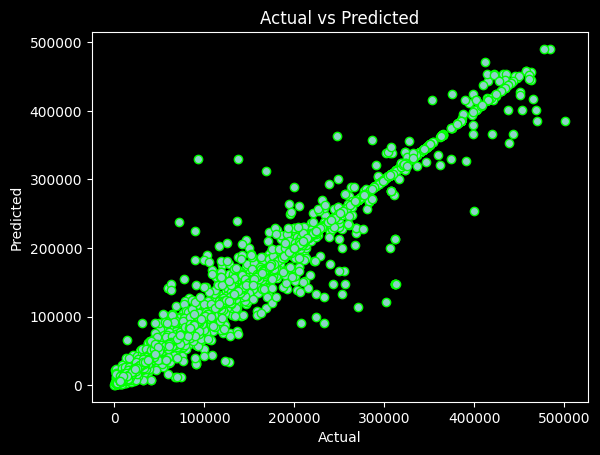

In [170]:
fig, ax = plt.subplots() 

ax.scatter(new_data["yield_actual"], new_data["yield_predicted"],edgecolors=(0, 1, 0))

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

In [171]:
results

[('Linear Regression',
  0.7576998207199755,
  1784928351.720376,
  0.7576998207199755),
 ('Decision Tree', 0.977996333641384, 162092195.0697345, 0.977996333641384),
 ('Random Forest', 0.987440675235979, 92519514.08528374, 0.987440675235979),
 ('Gradient Boost', 0.8707848034465513, 951876587.4903578, 0.8707848034465513),
 ('XGBoost', 0.9732466106314921, 197081501.67432004, 0.9732466106314921),
 ('Bagging Regressor',
  0.9875251265276098,
  91897395.25227554,
  0.9875251265276098),
 ('KNN', 0.8471165209931792, 1126231342.4603329, 0.8471165209931792)]

In [172]:
df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Mean Square Error', 'R2 Score'])

df.to_csv('model_performances.csv', index=False)

In [8]:
df.head()

,Model,Accuracy,Mean Square Error,R2 Score
0,Linear Regression,0.757700,1.784928e+09,0.757700
1,Decision Tree,0.977996,1.620922e+08,0.977996
2,Random Forest,0.987441,9.251951e+07,0.987441
3,Gradient Boost,0.870785,9.518766e+08,0.870785
4,XGBoost,0.973247,1.970815e+08,0.973247


In [5]:
px.bar(df, x = 'Accuracy', y = 'Model', template = 'seaborn')  

In [6]:
px.bar(df, x = 'Mean Square Error', y = 'Model', template = 'seaborn') 

In [7]:
px.bar(df, x = 'R2 Score', y = 'Model', template = 'seaborn') 